In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style="darkgrid",font_scale=1.5)

from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix


In [3]:
import pandas as pd

df = pd.read_csv('C:\\Users\\Shreeya Rajurikar\\Downloads\\Iris.csv')

print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [4]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df_copy=df.copy()
     
df_copy    

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
df_copy.drop(columns=['Id'],axis=0,inplace=True)
     
df_copy.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [9]:
df_copy.shape
print('Rows ---->',df.shape[0])
print('Columns ---->',df.shape[1])

Rows ----> 150
Columns ----> 6


In [12]:
df_copy.describe()     

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
df_copy.size  

750

In [14]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [15]:
df_copy.columns = ['sl','sw','pl','pw','species']
df_split_iris=df_copy.species.str.split('-',n=-1,expand=True)
df_split_iris.drop(columns=0,axis=1,inplace=True)
df_split_iris

,1
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [16]:
df3_full=df_copy.join(df_split_iris)
df3_full

,sl,sw,pl,pw,species,1
0,5.1,3.5,1.4,0.2,Iris-setosa,setosa
1,4.9,3.0,1.4,0.2,Iris-setosa,setosa
2,4.7,3.2,1.3,0.2,Iris-setosa,setosa
3,4.6,3.1,1.5,0.2,Iris-setosa,setosa
4,5.0,3.6,1.4,0.2,Iris-setosa,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,virginica
146,6.3,2.5,5.0,1.9,Iris-virginica,virginica
147,6.5,3.0,5.2,2.0,Iris-virginica,virginica
148,6.2,3.4,5.4,2.3,Iris-virginica,virginica


In [17]:
df3_full.drop(columns='species',axis=1,inplace=True) #Drop excessive column     

df3_full

,sl,sw,pl,pw,1
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [18]:
df3_full.shape

(150, 5)

In [19]:
df3_full.isna()

,sl,sw,pl,pw,1
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [20]:
df3_full.isna().sum()

sl    0
sw    0
pl    0
pw    0
1     0
dtype: int64

In [22]:
import pandas as pd
# Assuming 's' is the column with categorical data like 'setosa'
df3_full_numeric = df3_full.select_dtypes(include=['number'])  # Select only numeric columns
df3_full_numeric.corr()  # Calculate correlation matrix on numeric data

,sl,sw,pl,pw
sl,1.000000,-0.109369,0.871754,0.817954
sw,-0.109369,1.000000,-0.420516,-0.356544
pl,0.871754,-0.420516,1.000000,0.962757
pw,0.817954,-0.356544,0.962757,1.000000


In [23]:
df3_full.describe()

,sl,sw,pl,pw
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [24]:
df.dtypes.to_frame().rename(columns={0:"Data-Types"})

,Data-Types
Id,int64
SepalLengthCm,float64
SepalWidthCm,float64
PetalLengthCm,float64
PetalWidthCm,float64
Species,object


In [25]:
df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})

,Total No. of Missing Values
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [26]:
df.duplicated().sum()

0

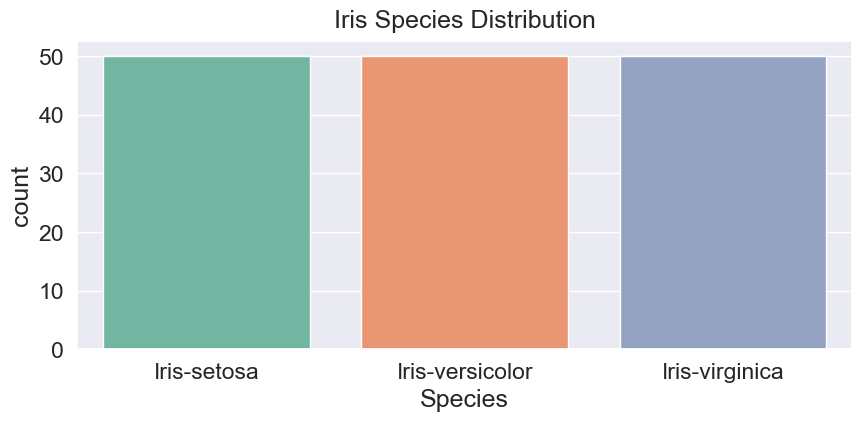

In [33]:
plt.figure(figsize=(10,4))
sns.countplot(x=df["Species"],data=df,palette="Set2") 
plt.title("Iris Species Distribution",pad=10)
plt.show()

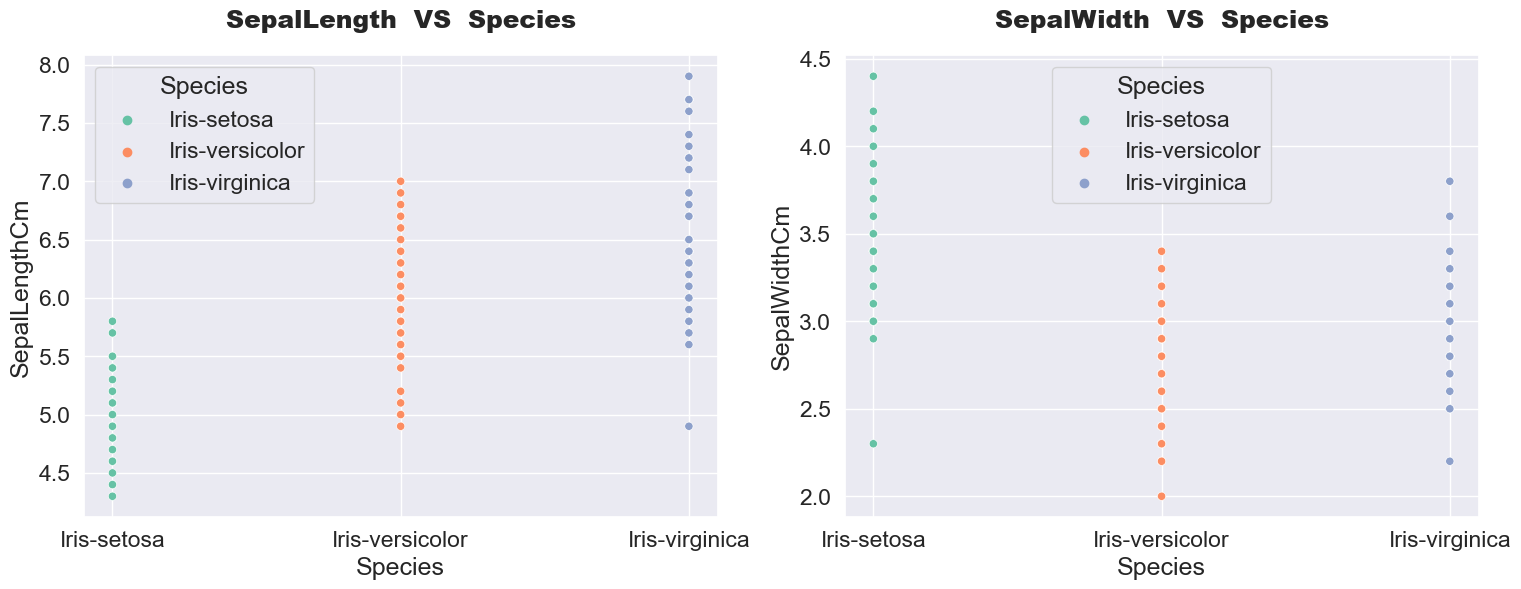

In [34]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.scatterplot(x="Species", y="SepalLengthCm", data=df, hue="Species", palette="Set2") # Pass 'Species' as x and 'SepalLengthCm' as y
plt.title("SepalLength  VS  Species", pad=20, fontweight="black")
plt.subplot(1,2,2)
sns.scatterplot(x="Species", y="SepalWidthCm", data=df, hue="Species", palette="Set2") # Pass 'Species' as x and 'SepalWidthCm' as y
plt.title("SepalWidth  VS  Species", pad=20, fontweight="black")
plt.show()    

In [37]:
x = df.drop(columns=["Species","Id"])
y = df["Species"]
     

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
     

print(x_train.shape,y_train.shape)

print(x_test.shape,y_test.shape)

(120, 4) (120,)
(30, 4) (30,)


In [38]:
clf = LogisticRegression()
     

clf.fit(x_train,y_train)

LogisticRegression()

In [39]:
train_pred = clf.predict(x_train)
test_pred = clf.predict(x_test)
     

print("Accuraacy on Training Data is: ",accuracy_score(y_train,train_pred)*100)

print("Accuracy on Tetsing Data is:",accuracy_score(y_test,test_pred)*100)

Accuraacy on Training Data is:  97.5
Accuracy on Tetsing Data is: 100.0


In [40]:
cm = confusion_matrix(y_test,test_pred)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

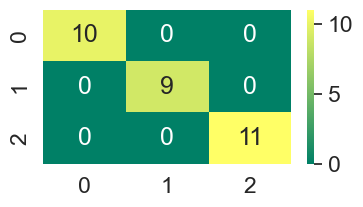

In [41]:
plt.figure(figsize=(4,2))
sns.heatmap(cm,annot=True,fmt="g",cmap="summer")
plt.show()